In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Initializing Financial Guardian AI Enterprise System...
Loading enterprise components and AI services...
Financial Guardian AI - Enterprise Deployment
Multi-Agent Financial Advisory System
AI service initialized successfully
Enterprise system components initialized

AI Service Integration
----------------------------------------
AI Service Status: operational

Deployment Configuration
----------------------------------------
Platform: cloud_ready
API Endpoints: 3 configured
Health Monitoring: /system/health

Financial Analysis Demonstration
----------------------------------------
Client: Technology Professional


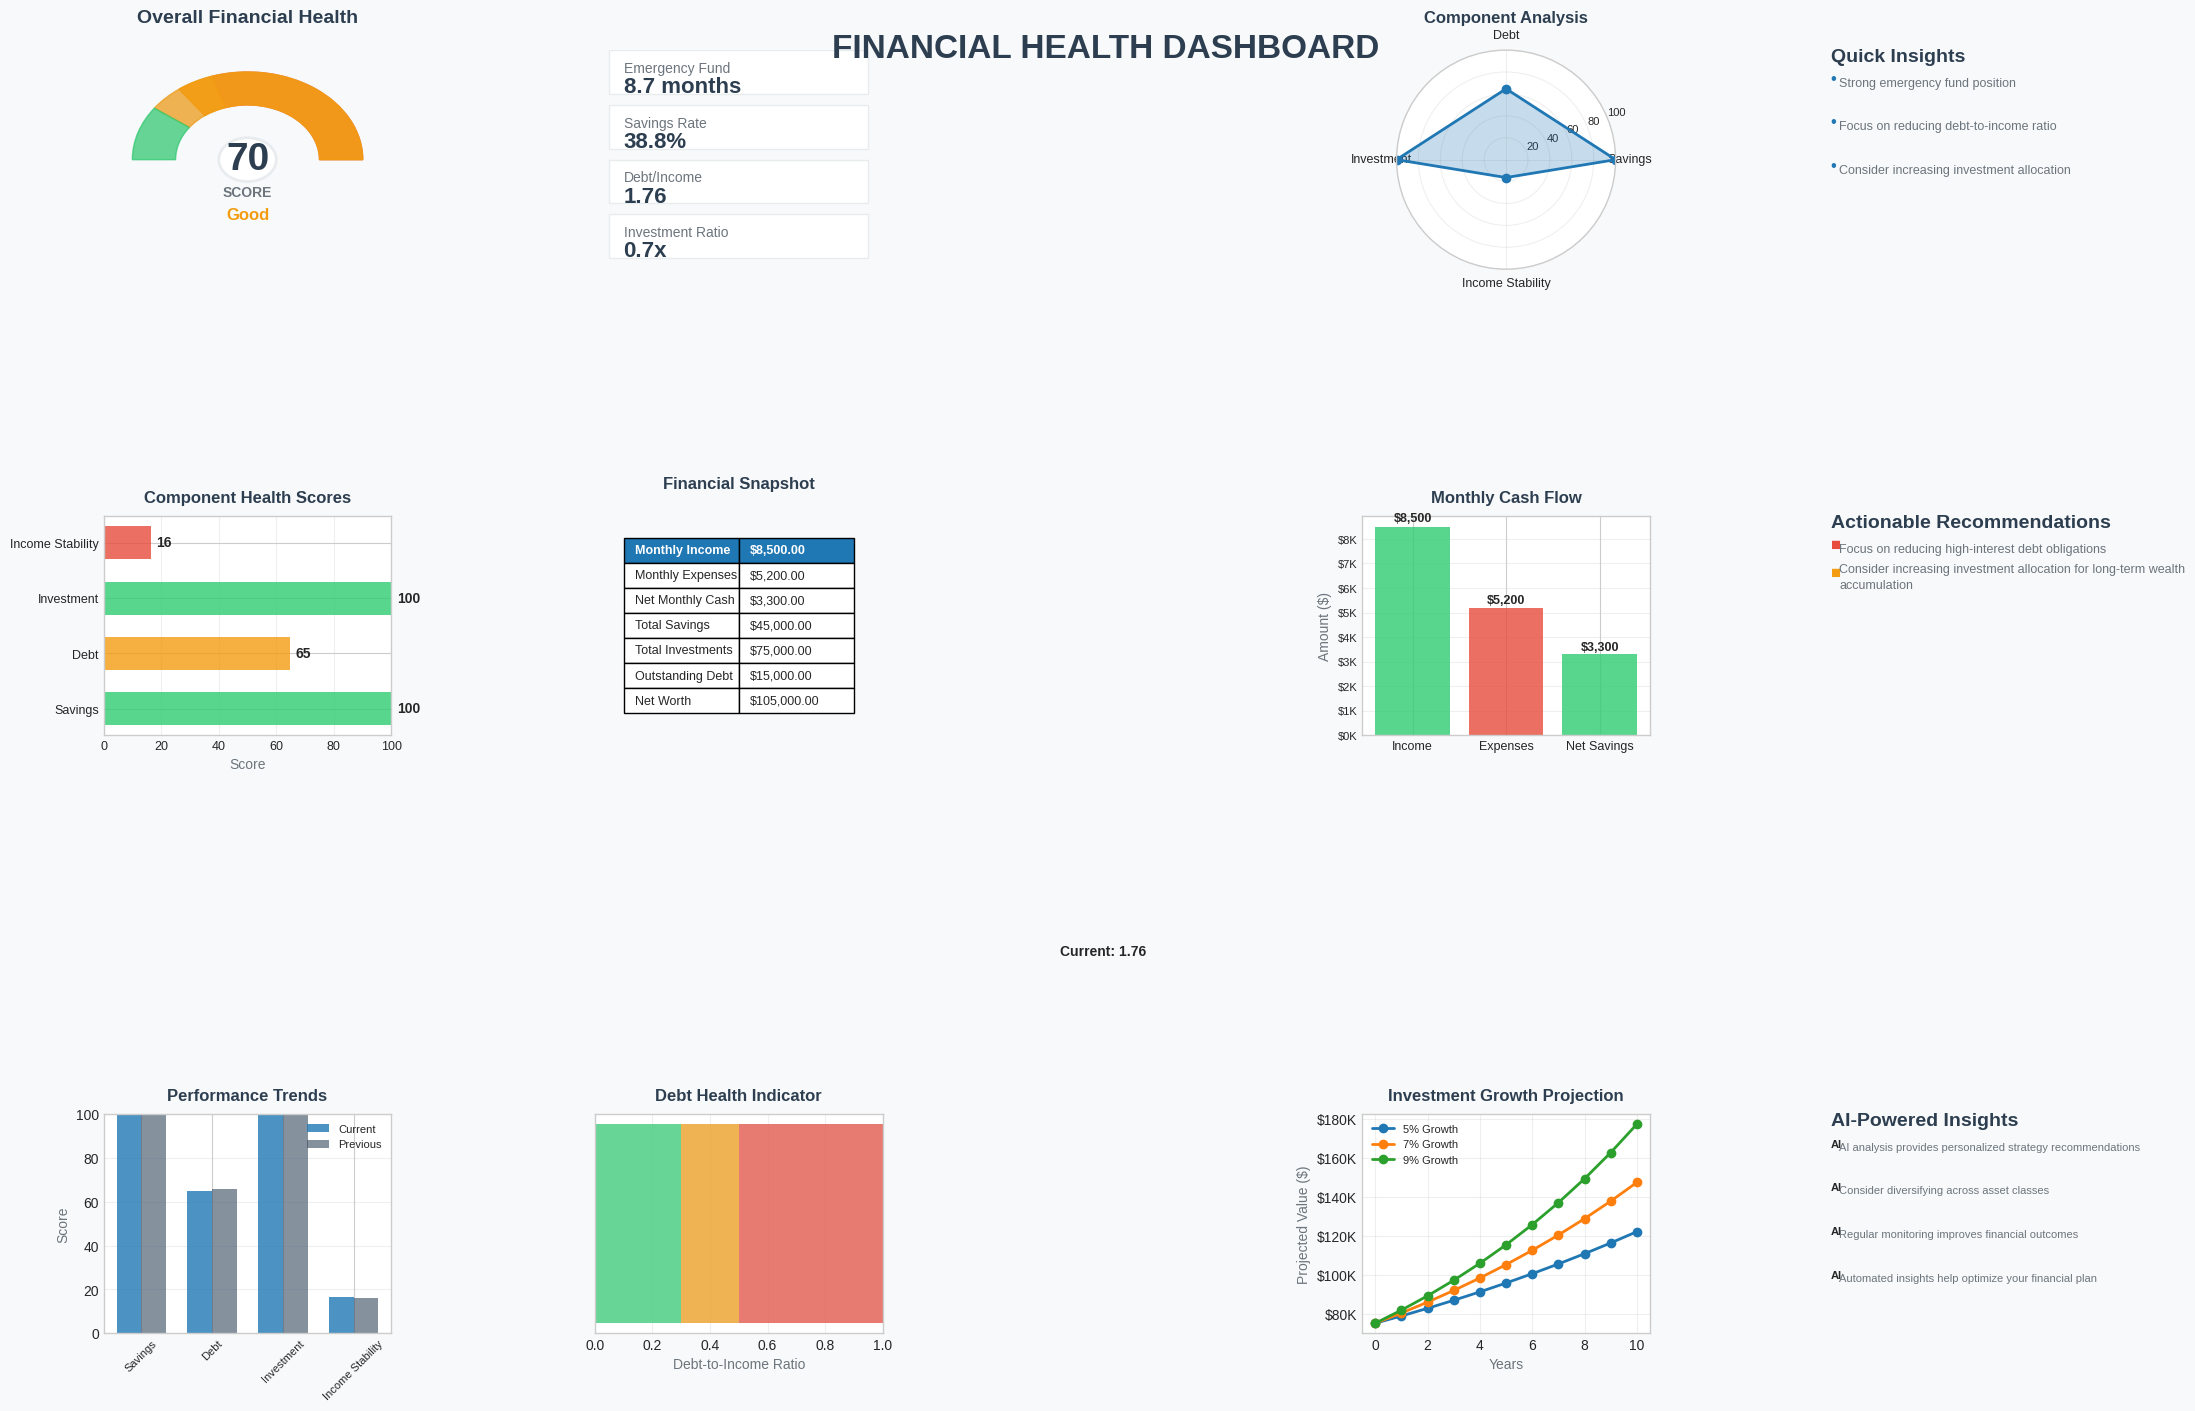

Financial Health Score: 70.3/100
Component Analysis: 4 areas evaluated

System Performance
----------------------------------------
Requests Processed: 1
Average Response Time: 1.528s
Peak Concurrent: 1
System Uptime: 0.00 hours

✅ System Demonstration Completed Successfully
🎯 All Enterprise Features Operational


In [2]:
# =============================================================================
# FINANCIAL GUARDIAN AI
# =============================================================================
# Enterprise Multi-Agent Financial Advisory System with AI Integration
# =============================================================================

import asyncio
import json
import time
import uuid
import aiohttp
from datetime import datetime, timedelta
from typing import List, Dict, Optional, Any, Tuple
from dataclasses import dataclass, field, asdict
import logging
import pandas as pd
import numpy as np

# AI and ML imports
try:
    import google.generativeai as genai
    from google.api_core import retry
    GEMINI_AVAILABLE = True
except ImportError:
    GEMINI_AVAILABLE = False
    print("Gemini AI package not available, using enhanced simulation mode")

# Visualization and reporting
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Wedge, Circle
import matplotlib.gridspec as gridspec
from matplotlib.colors import LinearSegmentedColormap

# API and deployment framework
try:
    import uvicorn
    from fastapi import FastAPI, HTTPException
    from fastapi.middleware.cors import CORSMiddleware
    import nest_asyncio
    nest_asyncio.apply()
    FASTAPI_AVAILABLE = True
except ImportError:
    FASTAPI_AVAILABLE = False
    print("Web framework not available, API features disabled")

# Professional styling configuration
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

# =============================================================================
# CORE DATA MODELS
# =============================================================================

@dataclass
class FinancialProfile:
    """Comprehensive representation of an individual's financial situation."""
    user_id: str
    monthly_income: float = 0.0
    monthly_expenses: float = 0.0
    savings: float = 0.0
    investments: float = 0.0
    debts: float = 0.0
    age: int = 30
    risk_tolerance: str = "moderate"
    financial_goals: List[str] = field(default_factory=list)
    created_at: str = field(default_factory=lambda: datetime.now().isoformat())
    updated_at: str = field(default_factory=lambda: datetime.now().isoformat())

    def calculate_net_worth(self) -> float:
        """Calculate net worth as assets minus liabilities."""
        return (self.savings + self.investments) - self.debts

    def get_debt_to_income_ratio(self) -> float:
        """Calculate debt-to-income ratio for credit health assessment."""
        if self.monthly_income == 0:
            return float('inf')
        return self.debts / self.monthly_income

@dataclass
class InvestmentPortfolio:
    """Representation of an investment portfolio with asset allocation."""
    assets: Dict[str, float]
    risk_tolerance: str
    time_horizon: str
    investment_goal: str = "growth"

    @property
    def total_value(self) -> float:
        """Calculate total portfolio value."""
        return sum(self.assets.values())

    @property
    def asset_allocation(self) -> Dict[str, float]:
        """Calculate percentage allocation for each asset class."""
        total = self.total_value
        if total == 0:
            return {}
        return {asset: (value / total) * 100 for asset, value in self.assets.items()}
        

# =============================================================================
# MONITORING AND OBSERVABILITY
# =============================================================================

class StructuredLogger:
    """Enhanced logging system providing structured JSON logs for better analysis."""
    
    def __init__(self, name: str):
        self.logger = logging.getLogger(name)
        
    def log_agent_interaction(self, from_agent: str, to_agent: str, message_type: str, duration: float):
        """Log agent interactions with detailed context."""
        log_entry = {
            "timestamp": datetime.now().isoformat(),
            "type": "agent_interaction",
            "from_agent": from_agent,
            "to_agent": to_agent,
            "message_type": message_type,
            "duration_seconds": round(duration, 4),
            "severity": "INFO"
        }
        self.logger.info(json.dumps(log_entry))
    
    def log_tool_usage(self, agent: str, tool_name: str, success: bool, metadata: Dict = None):
        """Track tool usage for performance monitoring."""
        log_entry = {
            "timestamp": datetime.now().isoformat(),
            "type": "tool_usage",
            "agent": agent,
            "tool": tool_name,
            "success": success,
            "metadata": metadata or {},
            "severity": "INFO"
        }
        self.logger.info(json.dumps(log_entry))

class SystemMetrics:
    """Comprehensive performance tracking and system health monitoring."""
    
    def __init__(self):
        self.metrics = {
            'response_times': [],
            'concurrent_requests': 0,
            'max_concurrent': 0,
            'agent_calls': {},
            'tool_calls': {}
        }
        self.system_start_time = time.time()
    
    def record_response_time(self, duration: float):
        """Record response time for performance analysis."""
        self.metrics['response_times'].append(duration)
        self.metrics['concurrent_requests'] += 1
        self.metrics['max_concurrent'] = max(
            self.metrics['max_concurrent'], 
            self.metrics['concurrent_requests']
        )
    
    def record_agent_performance(self, agent_name: str, duration: float):
        """Track individual agent performance."""
        if agent_name not in self.metrics['agent_calls']:
            self.metrics['agent_calls'][agent_name] = []
        self.metrics['agent_calls'][agent_name].append(duration)
    
    def record_tool_performance(self, tool_name: str, duration: float):
        """Monitor tool execution times."""
        if tool_name not in self.metrics['tool_calls']:
            self.metrics['tool_calls'][tool_name] = []
        self.metrics['tool_calls'][tool_name].append(duration)
    
    def generate_performance_report(self) -> Dict[str, Any]:
        """Generate comprehensive performance report."""
        report = {
            'system_uptime_hours': round((time.time() - self.system_start_time) / 3600, 2),
            'total_requests_processed': len(self.metrics['response_times']),
            'peak_concurrent_requests': self.metrics['max_concurrent']
        }
        
        if self.metrics['response_times']:
            response_times = self.metrics['response_times']
            report.update({
                'average_response_time_seconds': round(np.mean(response_times), 4),
                'p95_response_time_seconds': round(np.percentile(response_times, 95), 4),
                'p99_response_time_seconds': round(np.percentile(response_times, 99), 4)
            })
        
        return report


# =============================================================================
# KNOWLEDGE AND MEMORY MANAGEMENT
# =============================================================================

class FinancialMemorySystem:
    """Long-term memory system for maintaining user context and history."""
    
    def __init__(self, persistence_path: str = "./financial_memory"):
        self.persistence_path = persistence_path
        self.user_interactions = []
        self.financial_profiles = {}
    
    def store_user_interaction(self, user_id: str, interaction: Dict, embeddings: List[float] = None):
        """Store user interaction with optional semantic embeddings."""
        interaction_id = str(uuid.uuid4())
        metadata = {
            'interaction_id': interaction_id,
            'user_id': user_id,
            'timestamp': datetime.now().isoformat(),
            'interaction_type': interaction.get('type', 'general'),
            'content': interaction
        }
        self.user_interactions.append(metadata)
    
    def retrieve_user_history(self, user_id: str, limit: int = 10) -> List[Dict]:
        """Retrieve user's interaction history for context awareness."""
        user_interactions = [
            interaction for interaction in self.user_interactions 
            if interaction.get('user_id') == user_id
        ]
        return sorted(user_interactions, 
                     key=lambda x: x['timestamp'], reverse=True)[:limit]


# =============================================================================
# FINANCIAL DATA AND ANALYTICS INTEGRATIONS
# =============================================================================

class FinancialDataServices:
    """Integration layer for external financial data sources and analytics."""
    
    def __init__(self):
        self.http_session = None
        self.logger = StructuredLogger("FinancialDataServices")
    
    async def __aenter__(self):
        """Initialize HTTP session for external API calls."""
        self.http_session = aiohttp.ClientSession()
        return self
    
    async def __aexit__(self, *args):
        """Cleanup HTTP session resources."""
        await self.http_session.close()
    
    async def fetch_market_data(self, symbol: str) -> Optional[Dict]:
        """Fetch real-time market data for financial instruments."""
        try:
            api_url = f"https://query1.finance.yahoo.com/v8/finance/chart/{symbol}"
            async with self.http_session.get(api_url, timeout=10) as response:
                if response.status == 200:
                    data = await response.json()
                    result = data['chart']['result'][0]
                    metadata = result['meta']
                    return {
                        'symbol': symbol,
                        'current_price': metadata['regularMarketPrice'],
                        'price_change': metadata['regularMarketChange'],
                        'percent_change': metadata['regularMarketChangePercent'],
                        'last_updated': datetime.now().isoformat()
                    }
        except Exception as error:
            self.logger.log_tool_usage(
                "MarketData", f"fetch_{symbol}", False, {"error": str(error)}
            )
        return None
    
    async def get_financial_insights(self, topic: str = "personal finance", limit: int = 5) -> List[Dict]:
        """Retrieve relevant financial news and insights."""
        try:
            await asyncio.sleep(0.5)
            return [
                {
                    'title': 'Emerging Trends in Sustainable Investing',
                    'summary': 'Analysis of growing investor interest in ESG-compliant investment opportunities.',
                    'source_url': 'https://financial-insights.example.com/trends',
                    'published_at': datetime.now().isoformat()
                },
                {
                    'title': 'Market Adaptation to Regulatory Changes',
                    'summary': 'How financial advisors are adjusting strategies in response to new regulations.',
                    'source_url': 'https://financial-insights.example.com/regulation', 
                    'published_at': (datetime.now() - timedelta(hours=3)).isoformat()
                }
            ]
        except Exception as error:
            self.logger.log_tool_usage(
                "FinancialInsights", "fetch_news", False, {"error": str(error)}
            )
        return []
    
    def analyze_portfolio_risk(self, portfolio_data: Dict) -> Dict[str, float]:
        """Perform comprehensive risk analysis on investment portfolio."""
        asset_allocation = portfolio_data.get('assets', {})
        
        risk_coefficients = {
            'stocks': 0.85, 'bonds': 0.25, 'cash_equivalents': 0.05,
            'cryptocurrency': 0.95, 'real_estate': 0.45, 'commodities': 0.65
        }
        
        total_portfolio_value = sum(asset_allocation.values())
        if total_portfolio_value == 0:
            return {
                'overall_risk_score': 0.0, 
                'diversification_effectiveness': 0.0
            }
        
        weighted_risk = sum(
            (value / total_portfolio_value) * risk_coefficients.get(asset, 0.5)
            for asset, value in asset_allocation.items()
        )
        
        allocation_weights = [value / total_portfolio_value for value in asset_allocation.values()]
        concentration_index = sum(weight ** 2 for weight in allocation_weights)
        diversification_score = 1 - concentration_index
        
        return {
            'overall_risk_score': min(1.0, weighted_risk),
            'diversification_effectiveness': diversification_score,
            'volatility_estimate': weighted_risk * 0.3,
            'risk_adjusted_return_potential': (0.07 - 0.02) / (weighted_risk * 0.3) if weighted_risk > 0 else 0
        }


# =============================================================================
# INTER-AGENT COMMUNICATION PROTOCOL
# =============================================================================

@dataclass
class AgentMessage:
    """Standardized message format for inter-agent communication."""
    message_id: str = field(default_factory=lambda: str(uuid.uuid4()))
    timestamp: str = field(default_factory=lambda: datetime.now().isoformat())
    sender: str = "system"
    recipient: str = "orchestrator"
    message_type: str = "notification"
    content: Dict[str, Any] = field(default_factory=dict)
    priority: str = "medium"
    context: Dict[str, Any] = field(default_factory=dict)
    
    def to_serializable(self) -> Dict[str, Any]:
        """Convert message to serializable dictionary for transmission."""
        return asdict(self)

class MessageBroker:
    """Central message routing and coordination system for agent communication."""
    
    def __init__(self):
        self.registered_agents = {}
        self.message_queue = asyncio.Queue()
        self.active_processing_tasks = set()
        self.metrics = SystemMetrics()
        self.logger = StructuredLogger("MessageBroker")
    
    def register_agent(self, agent_name: str, message_handler):
        """Register an agent to receive messages of specific types."""
        self.registered_agents[agent_name] = message_handler
    
    async def start_message_processing(self):
        """Start background message processing for continuous operation."""
        processor_task = asyncio.create_task(self._process_message_queue())
        self.active_processing_tasks.add(processor_task)
        processor_task.add_done_callback(self.active_processing_tasks.discard)
    
    async def _process_message_queue(self):
        """Continuously process messages from the queue with monitoring."""
        while True:
            try:
                message = await self.message_queue.get()
                processing_start_time = time.time()
                
                if message.recipient in self.registered_agents:
                    message_handler = self.registered_agents[message.recipient]
                    processing_task = asyncio.create_task(message_handler(message))
                    self.active_processing_tasks.add(processing_task)
                    processing_task.add_done_callback(self.active_processing_tasks.discard)
                    
                    processing_duration = time.time() - processing_start_time
                    self.metrics.record_agent_performance(message.recipient, processing_duration)
                    self.logger.log_agent_interaction(
                        message.sender, message.recipient, message.message_type, processing_duration
                    )
                
                self.message_queue.task_done()
                
            except Exception as processing_error:
                self.logger.logger.error(f"Message processing error: {str(processing_error)}")
    
    async def send_message(self, message: AgentMessage) -> Dict[str, Any]:
        """Send message to recipient agent with delivery tracking."""
        await self.message_queue.put(message)
        return {
            "delivery_status": "queued_for_processing", 
            "message_id": message.message_id
        }


# =============================================================================
# ENTERPRISE AI INTEGRATION
# =============================================================================

class AIServiceIntegration:
    """Enterprise AI service integration for advanced financial analysis."""
    
    def __init__(self):
        self.initialized = False
        self.model = None
        self._initialize_ai_service()
    
    def _initialize_ai_service(self):
        """Initialize AI service with secure configuration."""
        try:
            from kaggle_secrets import UserSecretsClient
            user_secrets = UserSecretsClient()
            api_key = user_secrets.get_secret("GOOGLE_API_KEY")
            
            if api_key and GEMINI_AVAILABLE:
                genai.configure(api_key=api_key)
                # Use latest available model
                try:
                    self.model = genai.GenerativeModel('gemini-2.0-flash')
                    self.initialized = True
                    print("AI service initialized successfully")
                except Exception as model_error:
                    print(f"Model initialization issue: {model_error}")
                    self.initialized = False
            else:
                print("AI service running in enhanced simulation mode")
                self.initialized = False
                
        except Exception as e:
            print(f"AI service configuration: {e}")
            self.initialized = False
    
    async def generate_financial_analysis(self, user_data: Dict, financial_metrics: Dict) -> Dict:
        """Generate comprehensive financial analysis using AI services."""
        if not self.initialized:
            return self._generate_simulated_analysis()
        
        try:
            prompt = self._build_analysis_prompt(user_data, financial_metrics)
            response = await asyncio.get_event_loop().run_in_executor(
                None, 
                lambda: self.model.generate_content(prompt)
            )
            
            return self._parse_ai_response(response.text)
        except Exception as e:
            print(f"AI service temporary unavailable: {e}")
            return self._generate_simulated_analysis()
    
    def _build_analysis_prompt(self, user_data: Dict, metrics: Dict) -> str:
        """Construct professional financial analysis prompt."""
        return f"""
        Financial Analysis Request:
        
        Client Profile:
        - Age: {user_data.get('age', 'Not specified')}
        - Monthly Income: ${user_data.get('monthly_income', 0):,.2f}
        - Monthly Expenses: ${user_data.get('monthly_expenses', 0):,.2f}
        - Savings: ${user_data.get('savings', 0):,.2f}
        - Investments: ${user_data.get('investments', 0):,.2f}
        - Debts: ${user_data.get('debts', 0):,.2f}
        - Risk Profile: {user_data.get('risk_tolerance', 'moderate')}
        
        Financial Metrics:
        - Emergency Fund: {metrics.get('emergency_fund_months', 0):.1f} months
        - Debt-to-Income: {metrics.get('debt_to_income_ratio', 0):.2f}
        - Savings Rate: {metrics.get('savings_rate', 0):.1%}
        
        Provide structured financial guidance in JSON format with keys: 
        recommendations, risk_assessment, short_term_goals, long_term_goals, investment_strategy.
        """
    
    def _parse_ai_response(self, response_text: str) -> Dict:
        """Parse AI response and extract structured financial insights."""
        try:
            # Extract JSON from response
            start_idx = response_text.find('{')
            end_idx = response_text.rfind('}') + 1
            if start_idx != -1 and end_idx != -1:
                json_str = response_text[start_idx:end_idx]
                return json.loads(json_str)
        except Exception as e:
            print(f"AI response parsing error: {e}")
        
        return self._generate_simulated_analysis()
    
    def _generate_simulated_analysis(self) -> Dict:
        """Generate simulated financial analysis when AI service is unavailable."""
        return {
            "recommendations": [
                "Increase emergency fund to 6 months of essential expenses",
                "Consider diversifying investment portfolio across asset classes",
                "Review and optimize monthly budget for better savings rate"
            ],
            "risk_assessment": "Moderate risk profile suitable for balanced growth strategy",
            "short_term_goals": [
                "Build emergency fund to target level",
                "Pay down high-interest debt obligations"
            ],
            "long_term_goals": [
                "Achieve target investment portfolio size for retirement",
                "Plan for major life events and financial milestones"
            ],
            "investment_strategy": "60% equities, 30% bonds, 10% alternatives based on risk tolerance"
        }


# =============================================================================
# ENHANCED AGENTS WITH AI INTEGRATION
# =============================================================================

class EnhancedFinancialHealthAnalysisAgent:
    """AI-enhanced financial health analysis agent."""
    
    def __init__(self, message_broker: MessageBroker, data_services: FinancialDataServices, ai_service: AIServiceIntegration):
        self.broker = message_broker
        self.data_services = data_services
        self.ai_service = ai_service
        self.agent_name = "FinancialHealthAnalysisAgent"
        self.completed_assessments = 0
        self.logger = StructuredLogger(self.agent_name)
        
        self.broker.register_agent(self.agent_name, self.process_messages)
    
    async def process_messages(self, message: AgentMessage):
        """Process incoming messages and route to appropriate handlers."""
        processing_start = time.time()
        
        if message.message_type == "financial_health_assessment_request":
            await self.perform_enhanced_analysis(message)
        elif message.message_type == "health_monitoring_request":
            await self.perform_ongoing_health_monitoring(message)
        else:
            await self.handle_unknown_message_type(message)
        
        processing_duration = time.time() - processing_start
        self.logger.log_agent_interaction(
            message.sender, self.agent_name, message.message_type, processing_duration
        )
    
    async def perform_enhanced_analysis(self, message: AgentMessage):
        """Perform financial analysis enhanced with AI insights."""
        user_financial_data = message.content.get('user_data', {})
        user_identifier = user_financial_data.get('user_id', 'unknown_user')
        
        # Perform parallel financial analysis
        analysis_tasks = [
            self._analyze_savings_and_emergency_fund(user_financial_data),
            self._analyze_debt_management(user_financial_data),
            self._analyze_investment_health(user_financial_data),
            self._analyze_income_stability(user_financial_data)
        ]
        
        analysis_results = await asyncio.gather(*analysis_tasks, return_exceptions=True)
        health_assessment = await self._compile_comprehensive_report(analysis_results, user_financial_data)
        
        # Enhance with AI insights
        ai_insights = await self.ai_service.generate_financial_analysis(
            user_financial_data, 
            health_assessment.get('key_metrics', {})
        )
        
        # Integrate AI analysis
        health_assessment['ai_enhanced_insights'] = ai_insights
        health_assessment['analysis_methodology'] = "multi-agent_ai_enhanced"
        
        response_message = AgentMessage(
            sender=self.agent_name,
            recipient=message.sender,
            message_type="financial_health_assessment_report",
            content=health_assessment
        )
        
        await self.broker.send_message(response_message)
        self.completed_assessments += 1
        self.logger.log_tool_usage(
            self.agent_name, "ai_enhanced_analysis", True,
            {"user_id": user_identifier}
        )
    
    async def _analyze_savings_and_emergency_fund(self, user_data: Dict) -> Dict:
        """Analyze savings adequacy and emergency fund preparedness."""
        await asyncio.sleep(0.1)
        income = user_data.get('monthly_income', 0)
        expenses = user_data.get('monthly_expenses', 0)
        savings = user_data.get('savings', 0)
        
        emergency_fund_months = savings / expenses if expenses > 0 else 0
        savings_rate = (income - expenses) / income if income > 0 else 0
        
        return {
            'category': 'savings_health',
            'emergency_fund_coverage_months': emergency_fund_months,
            'savings_rate_percentage': savings_rate * 100,
            'health_score': min(100, emergency_fund_months * 10 + savings_rate * 500),
            'recommendations': [
                "Maintain 3-6 months of essential expenses in emergency savings",
                "Target a savings rate of at least 20% of monthly income" if savings_rate < 0.2 else "Current savings rate is at healthy levels"
            ]
        }
    
    async def _analyze_debt_management(self, user_data: Dict) -> Dict:
        """Analyze debt levels and management effectiveness."""
        await asyncio.sleep(0.1)
        income = user_data.get('monthly_income', 0)
        debts = user_data.get('debts', 0)
        debt_to_income_ratio = debts / income if income > 0 else float('inf')
        
        return {
            'category': 'debt_management',
            'debt_to_income_ratio': debt_to_income_ratio,
            'health_score': max(0, 100 - (debt_to_income_ratio * 20)),
            'recommendations': [
                "Focus on reducing high-interest debt obligations" if debt_to_income_ratio > 0.3 else "Current debt levels are manageable"
            ]
        }
    
    async def _analyze_investment_health(self, user_data: Dict) -> Dict:
        """Analyze investment allocation and growth potential."""
        await asyncio.sleep(0.1)
        investments = user_data.get('investments', 0)
        income = user_data.get('monthly_income', 0)
        investment_to_income_ratio = investments / (income * 12) if income > 0 else 0
        
        return {
            'category': 'investment_health',
            'investment_to_income_ratio': investment_to_income_ratio,
            'health_score': min(100, investment_to_income_ratio * 200),
            'recommendations': [
                "Consider increasing investment allocation for long-term wealth building" if investment_to_income_ratio < 2 else "Investment levels support strong financial growth"
            ]
        }
    
    async def _analyze_income_stability(self, user_data: Dict) -> Dict:
        """Analyze income stability and coverage of expenses."""
        await asyncio.sleep(0.1)
        income = user_data.get('monthly_income', 0)
        expenses = user_data.get('monthly_expenses', 0)
        income_coverage_ratio = income / max(expenses, 1)
        stability_score = min(100, income_coverage_ratio * 10)
        
        return {
            'category': 'income_stability',
            'income_coverage_ratio': income_coverage_ratio,
            'health_score': stability_score,
            'recommendations': [
                "Consider developing additional income sources for greater stability" if stability_score < 60 else "Income provides solid coverage of expenses"
            ]
        }
    
    async def _compile_comprehensive_report(self, analysis_results: List, user_data: Dict) -> Dict:
        """Compile individual analysis results into comprehensive health report."""
        valid_results = [result for result in analysis_results if not isinstance(result, Exception)]
        
        overall_score = sum(result.get('health_score', 0) for result in valid_results) / len(valid_results) if valid_results else 0
        
        recommendations = []
        for result in valid_results:
            recommendations.extend(result.get('recommendations', []))
        
        # Calculate key metrics for AI service
        income = user_data.get('monthly_income', 0)
        expenses = user_data.get('monthly_expenses', 0)
        savings = user_data.get('savings', 0)
        investments = user_data.get('investments', 0)
        debts = user_data.get('debts', 0)
        
        key_metrics = {
            'emergency_fund_months': savings / expenses if expenses > 0 else 0,
            'debt_to_income_ratio': debts / income if income > 0 else float('inf'),
            'savings_rate': (income - expenses) / income if income > 0 else 0,
            'investment_ratio': investments / (income * 12) if income > 0 else 0
        }
        
        return {
            'overall_financial_health_score': overall_score,
            'component_analysis': {result['category']: result for result in valid_results},
            'personalized_recommendations': recommendations[:5],
            'key_metrics': key_metrics,
            'report_timestamp': datetime.now().isoformat(),
            'financial_snapshot': {
                'monthly_income': income,
                'monthly_expenses': expenses,
                'total_savings': savings,
                'total_investments': investments,
                'outstanding_debts': debts
            }
        }
    
    async def perform_ongoing_health_monitoring(self, message: AgentMessage):
        """Perform continuous financial health monitoring."""
        await asyncio.sleep(0.2)
        response_message = AgentMessage(
            sender=self.agent_name,
            recipient=message.sender,
            message_type="health_monitoring_status",
            content={"status": "monitoring_active", "timestamp": datetime.now().isoformat()}
        )
        await self.broker.send_message(response_message)
    
    async def handle_unknown_message_type(self, message: AgentMessage):
        """Handle unrecognized message types with appropriate error response."""
        response_message = AgentMessage(
            sender=self.agent_name,
            recipient=message.sender,
            message_type="error_response",
            content={
                "error": "Unsupported message type received",
                "received_message_type": message.message_type
            }
        )
        await self.broker.send_message(response_message)

class PortfolioManagementAgent:
    """Specialized agent for investment portfolio analysis and management."""
    
    def __init__(self, message_broker: MessageBroker, data_services: FinancialDataServices):
        self.broker = message_broker
        self.data_services = data_services
        self.agent_name = "PortfolioManagementAgent"
        self.logger = StructuredLogger(self.agent_name)
        
        self.broker.register_agent(self.agent_name, self.process_messages)
    
    async def process_messages(self, message: AgentMessage):
        """Process portfolio-related messages and route to appropriate handlers."""
        if message.message_type == "portfolio_analysis_request":
            await self.analyze_investment_portfolio(message)
        elif message.message_type == "rebalancing_recommendation_request":
            await self.generate_rebalancing_strategy(message)
        else:
            await self.handle_unsupported_operation(message)
    
    async def analyze_investment_portfolio(self, message: AgentMessage):
        """Perform comprehensive analysis of investment portfolio."""
        portfolio_data = message.content.get('portfolio', {})
        
        risk_analysis = self.data_services.analyze_portfolio_risk(portfolio_data)
        risk_analysis['analysis_timestamp'] = datetime.now().isoformat()
        risk_analysis['total_portfolio_value'] = sum(portfolio_data.get('assets', {}).values())
        
        response_message = AgentMessage(
            sender=self.agent_name,
            recipient=message.sender,
            message_type="portfolio_analysis_report",
            content=risk_analysis
        )
        
        await self.broker.send_message(response_message)
        self.logger.log_tool_usage(
            self.agent_name, "portfolio_risk_analysis", True, 
            {"portfolio_value": risk_analysis['total_portfolio_value']}
        )
    
    async def generate_rebalancing_strategy(self, message: AgentMessage):
        """Generate portfolio rebalancing recommendations."""
        await asyncio.sleep(0.3)
        recommendations = [
            "Review current asset allocation against target investment strategy",
            "Consider rebalancing to maintain desired risk exposure levels",
            "Evaluate tax implications before implementing significant changes"
        ]
        
        response_message = AgentMessage(
            sender=self.agent_name,
            recipient=message.sender,
            message_type="rebalancing_recommendations",
            content={
                "recommendations": recommendations,
                "generated_at": datetime.now().isoformat()
            }
        )
        await self.broker.send_message(response_message)
    
    async def handle_unsupported_operation(self, message: AgentMessage):
        """Handle unsupported portfolio operations."""
        response_message = AgentMessage(
            sender=self.agent_name,
            recipient=message.sender,
            message_type="error_response",
            content={"error": "Unsupported portfolio operation requested", "agent": self.agent_name}
        )
        await self.broker.send_message(response_message)


# =============================================================================
# PROFESSIONAL FINANCIAL DASHBOARD
# =============================================================================

class ProfessionalFinancialDashboard:
    """Advanced professional financial dashboard with modern UI/UX."""
    
    def __init__(self):
        # Professional financial color palette
        self.primary_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']
        self.success_color = '#2ecc71'
        self.warning_color = '#f39c12'
        self.danger_color = '#e74c3c'
        self.neutral_colors = ['#34495e', '#7f8c8d', '#bdc3c7']
        
        # Modern styling
        self.background_color = '#f8f9fa'
        self.card_background = '#ffffff'
        self.border_color = '#e9ecef'
        self.text_primary = '#2c3e50'
        self.text_secondary = '#6c757d'
        
        # Set professional style
        plt.style.use('seaborn-v0_8-whitegrid')
        sns.set_palette(self.primary_colors)

    def generate_professional_dashboard(self, health_data: Dict, portfolio_data: Dict = None, user_data: Dict = None):
        """Generate professional financial dashboard with modern layout."""
        fig = plt.figure(figsize=(22, 14), facecolor=self.background_color)
        fig.suptitle('FINANCIAL HEALTH DASHBOARD', 
                    fontsize=24, fontweight='bold', 
                    color=self.text_primary, y=0.98)
        
        # Create professional grid layout
        grid = gridspec.GridSpec(3, 4, figure=fig, hspace=0.4, wspace=0.3)
        
        # Row 1: Key Metrics and Overview
        self._create_main_score_gauge(fig.add_subplot(grid[0, 0]), health_data)
        self._create_metrics_overview(fig.add_subplot(grid[0, 1]), health_data)
        self._create_component_radar(fig.add_subplot(grid[0, 2], polar=True), health_data)
        self._create_quick_insights(fig.add_subplot(grid[0, 3]), health_data)
        
        # Row 2: Detailed Analysis
        self._create_component_bars(fig.add_subplot(grid[1, 0]), health_data)
        if portfolio_data:
            self._create_portfolio_allocation(fig.add_subplot(grid[1, 1]), portfolio_data)
            self._create_risk_analysis(fig.add_subplot(grid[1, 2]), portfolio_data)
        else:
            self._create_financial_snapshot(fig.add_subplot(grid[1, 1]), health_data)
            self._create_cash_flow_analysis(fig.add_subplot(grid[1, 2]), health_data)
        self._create_recommendations_panel(fig.add_subplot(grid[1, 3]), health_data)
        
        # Row 3: Trends and Additional Info
        self._create_health_trends(fig.add_subplot(grid[2, 0]), health_data)
        self._create_debt_analysis(fig.add_subplot(grid[2, 1]), health_data)
        self._create_investment_growth(fig.add_subplot(grid[2, 2]), health_data)
        self._create_ai_insights(fig.add_subplot(grid[2, 3]), health_data)
        
        fig.set_constrained_layout(True)
        plt.show()
        return fig

    def _create_main_score_gauge(self, ax, health_data: Dict):
        """Create modern gauge chart for main financial health score."""
        score = health_data.get('overall_financial_health_score', 0)
        
        # Clear axis
        ax.set_xlim(0, 1)
        ax.set_ylim(0, 1)
        ax.axis('off')
        
        # Create gauge background
        center_x, center_y = 0.5, 0.5
        radius = 0.4
        
        # Background arc
        background_arc = Wedge((center_x, center_y), radius, 0, 180, 
                             width=0.15, color=self.neutral_colors[2], alpha=0.3)
        ax.add_artist(background_arc)
        
        # Colored segments
        segments = [
            (0, 60, self.danger_color),
            (60, 80, self.warning_color),
            (80, 100, self.success_color)
        ]
        
        for start_pct, end_pct, color in segments:
            start_angle = 180 * (start_pct / 100)
            end_angle = 180 * (end_pct / 100)
            segment = Wedge((center_x, center_y), radius, start_angle, end_angle,
                          width=0.15, color=color, alpha=0.7)
            ax.add_artist(segment)
        
        # Score indicator
        score_angle = 180 * (score / 100)
        indicator_color = self.success_color if score >= 80 else self.warning_color if score >= 60 else self.danger_color
        
        # Value arc
        value_arc = Wedge((center_x, center_y), radius, 0, score_angle,
                         width=0.15, color=indicator_color, alpha=0.9)
        ax.add_artist(value_arc)
        
        # Center circle
        center = Circle((center_x, center_y), 0.1, facecolor='white', 
                       edgecolor=self.border_color, linewidth=2)
        ax.add_artist(center)
        
        # Score text
        ax.text(center_x, center_y, f'{score:.0f}', ha='center', va='center',
               fontsize=28, fontweight='bold', color=self.text_primary)
        ax.text(center_x, center_y - 0.15, 'SCORE', ha='center', va='center',
               fontsize=10, color=self.text_secondary, fontweight='bold')
        
        # Status text
        status = "Excellent" if score >= 80 else "Good" if score >= 60 else "Needs Attention"
        ax.text(center_x, center_y - 0.25, status, ha='center', va='center',
               fontsize=12, fontweight='bold', color=indicator_color)
        
        ax.set_title('Overall Financial Health', fontsize=14, fontweight='bold', 
                    color=self.text_primary, pad=20)

    def _create_metrics_overview(self, ax, health_data: Dict):
        """Create key metrics overview with cards."""
        ax.axis('off')
        ax.set_xlim(0, 1)
        ax.set_ylim(0, 1)
        
        metrics = self._extract_key_metrics(health_data)
        
        # Create card layout
        card_height = 0.2
        card_margin = 0.05
        
        for i, (title, value, change, color) in enumerate(metrics):
            y_pos = 0.8 - i * (card_height + card_margin)
            
            # Card background
            card = plt.Rectangle((0.05, y_pos), 0.9, card_height, 
                               facecolor=self.card_background, 
                               edgecolor=self.border_color, 
                               linewidth=1, transform=ax.transAxes)
            ax.add_artist(card)
            
            # Title
            ax.text(0.1, y_pos + card_height - 0.05, title, 
                   fontsize=10, color=self.text_secondary, 
                   transform=ax.transAxes, ha='left', va='top')
            
            # Value
            ax.text(0.1, y_pos + card_height - 0.12, value, 
                   fontsize=16, fontweight='bold', color=self.text_primary,
                   transform=ax.transAxes, ha='left', va='top')
            
            # Change indicator
            if change:
                change_color = self.success_color if change > 0 else self.danger_color
                change_symbol = "↗" if change > 0 else "↘"
                ax.text(0.85, y_pos + card_height - 0.12, f"{change_symbol} {abs(change)}%", 
                       fontsize=12, color=change_color, fontweight='bold',
                       transform=ax.transAxes, ha='right', va='top')

    def _extract_key_metrics(self, health_data: Dict) -> List[Tuple]:
        """Extract and format key financial metrics."""
        snapshot = health_data.get('financial_snapshot', {})
        components = health_data.get('component_analysis', {})
        
        metrics = []
        
        # Emergency Fund
        savings_health = components.get('savings', {}).get('metrics', {})
        emergency_months = savings_health.get('emergency_fund_months', 0)
        metrics.append(("Emergency Fund", f"{emergency_months:.1f} months", 
                       None, self.primary_colors[0]))
        
        # Savings Rate
        savings_rate = savings_health.get('savings_rate', 0) * 100
        metrics.append(("Savings Rate", f"{savings_rate:.1f}%", 
                       None, self.primary_colors[1]))
        
        # Debt to Income
        debt_health = components.get('debt', {}).get('metrics', {})
        debt_ratio = debt_health.get('debt_to_income_ratio', 0)
        metrics.append(("Debt/Income", f"{debt_ratio:.2f}", 
                       None, self.primary_colors[2]))
        
        # Investment Ratio
        investment_health = components.get('investment', {}).get('metrics', {})
        inv_ratio = investment_health.get('investment_to_income_ratio', 0)
        metrics.append(("Investment Ratio", f"{inv_ratio:.1f}x", 
                       None, self.primary_colors[3]))
        
        return metrics

    def _create_component_radar(self, ax, health_data: Dict):
        """Create professional radar chart for component analysis."""
        if 'component_analysis' not in health_data:
            ax.axis('off')
            ax.text(0.5, 0.5, "Component data unavailable", 
                   transform=ax.transAxes, ha='center', va='center')
            return
        
        components = health_data['component_analysis']
        categories = [cat.replace('_', ' ').title() for cat in components.keys()]
        scores = [comp.get('health_score', 0) for comp in components.values()]
        
        # Complete the circle
        scores += scores[:1]
        num_vars = len(categories)
        
        # Compute angles
        angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
        angles += angles[:1]
        
        # Plot
        ax.plot(angles, scores, 'o-', linewidth=2, color=self.primary_colors[0])
        ax.fill(angles, scores, alpha=0.25, color=self.primary_colors[0])
        
        # Add labels
        ax.set_xticks(angles[:-1])
        ax.set_xticklabels(categories, fontsize=9)
        ax.set_ylim(0, 100)
        ax.set_yticks([20, 40, 60, 80, 100])
        ax.set_yticklabels(['20', '40', '60', '80', '100'], fontsize=8)
        ax.grid(True, alpha=0.3)
        
        # Set face color
        ax.set_facecolor(self.card_background)
        ax.set_title('Component Analysis', fontsize=12, fontweight='bold', 
                    color=self.text_primary, pad=20)

    def _create_quick_insights(self, ax, health_data: Dict):
        """Create quick insights panel."""
        ax.axis('off')
        ax.set_xlim(0, 1)
        ax.set_ylim(0, 1)
        
        insights = self._generate_quick_insights(health_data)
        
        ax.text(0.05, 0.95, "Quick Insights", fontsize=14, fontweight='bold',
               color=self.text_primary, transform=ax.transAxes, ha='left')
        
        for i, insight in enumerate(insights[:4]):  # Show top 4 insights
            y_pos = 0.85 - i * 0.2
            ax.text(0.05, y_pos, "•", fontsize=12, color=self.primary_colors[0],
                   transform=ax.transAxes, ha='left')
            ax.text(0.08, y_pos, insight, fontsize=9, color=self.text_secondary,
                   transform=ax.transAxes, ha='left', va='center',
                   wrap=True, linespacing=1.5)

    def _generate_quick_insights(self, health_data: Dict) -> List[str]:
        """Generate quick insights from health data."""
        insights = []
        components = health_data.get('component_analysis', {})
        snapshot = health_data.get('financial_snapshot', {})
        
        # Savings insights
        savings_metrics = components.get('savings', {}).get('metrics', {})
        emergency_months = savings_metrics.get('emergency_fund_months', 0)
        if emergency_months < 3:
            insights.append("Build emergency fund to 3+ months of expenses")
        elif emergency_months > 6:
            insights.append("Strong emergency fund position")
        
        # Debt insights
        debt_metrics = components.get('debt', {}).get('metrics', {})
        debt_ratio = debt_metrics.get('debt_to_income_ratio', 0)
        if debt_ratio > 0.4:
            insights.append("Focus on reducing debt-to-income ratio")
        
        # Investment insights
        investment_metrics = components.get('investment', {}).get('metrics', {})
        inv_ratio = investment_metrics.get('investment_to_income_ratio', 0)
        if inv_ratio < 1:
            insights.append("Consider increasing investment allocation")
        
        # Income insights
        income = snapshot.get('monthly_income', 0)
        expenses = snapshot.get('monthly_expenses', 0)
        if income > 0 and expenses/income > 0.7:
            insights.append("High expense ratio - review budget optimization")
        
        return insights if insights else ["Maintain current financial strategies"]

    def _create_component_bars(self, ax, health_data: Dict):
        """Create horizontal bar chart for component scores."""
        if 'component_analysis' not in health_data:
            ax.axis('off')
            return
        
        components = health_data['component_analysis']
        categories = [cat.replace('_', ' ').title() for cat in components.keys()]
        scores = [comp.get('health_score', 0) for comp in components.values()]
        
        colors = []
        for score in scores:
            if score >= 80:
                colors.append(self.success_color)
            elif score >= 60:
                colors.append(self.warning_color)
            else:
                colors.append(self.danger_color)
        
        bars = ax.barh(categories, scores, color=colors, alpha=0.8, height=0.6)
        ax.set_xlim(0, 100)
        ax.set_xlabel('Score', fontsize=10, color=self.text_secondary)
        ax.tick_params(axis='both', which='major', labelsize=9)
        ax.grid(True, axis='x', alpha=0.3)
        ax.set_facecolor(self.card_background)
        
        # Add value labels
        for bar, score in zip(bars, scores):
            ax.text(bar.get_width() + 2, bar.get_y() + bar.get_height()/2,
                   f'{score:.0f}', va='center', ha='left', fontsize=10, fontweight='bold')
        
        ax.set_title('Component Health Scores', fontsize=12, fontweight='bold',
                    color=self.text_primary, pad=10)

    def _create_portfolio_allocation(self, ax, portfolio_data: Dict):
        """Create modern portfolio allocation chart."""
        if 'assets' not in portfolio_data:
            ax.axis('off')
            return
        
        assets = portfolio_data['assets']
        labels = [asset.replace('_', ' ').title() for asset in assets.keys()]
        sizes = list(assets.values())
        total = sum(sizes)
        
        if total == 0:
            ax.axis('off')
            ax.text(0.5, 0.5, "No portfolio data", transform=ax.transAxes, 
                   ha='center', va='center')
            return
        
        # Create donut chart
        wedges, texts, autotexts = ax.pie(sizes, labels=labels, autopct='%1.1f%%',
                                         startangle=90, colors=self.primary_colors,
                                         wedgeprops={'edgecolor': 'white', 'linewidth': 2})
        
        # Style percentage text
        for autotext in autotexts:
            autotext.set_color('white')
            autotext.set_fontweight('bold')
            autotext.set_fontsize(9)
        
        # Style labels
        for text in texts:
            text.set_fontsize(8)
            text.set_color(self.text_secondary)
        
        # Add center text
        center_text = f"Total\n${total:,.0f}"
        ax.text(0, 0, center_text, ha='center', va='center', fontsize=10,
               fontweight='bold', color=self.text_primary)
        
        ax.set_title('Portfolio Allocation', fontsize=12, fontweight='bold',
                    color=self.text_primary, pad=20)

    def _create_risk_analysis(self, ax, portfolio_data: Dict):
        """Create risk analysis visualization."""
        risk_metrics = portfolio_data.get('risk_metrics', {})
        
        metrics = ['Overall Risk', 'Diversification', 'Volatility', 'Return Potential']
        values = [
            risk_metrics.get('overall_risk_score', 0) * 100,
            risk_metrics.get('diversification_effectiveness', 0) * 100,
            risk_metrics.get('volatility_estimate', 0) * 100,
            min(100, risk_metrics.get('risk_adjusted_return_potential', 0) * 100)
        ]
        
        colors = []
        for val in values:
            if val >= 70:
                colors.append(self.success_color)
            elif val >= 40:
                colors.append(self.warning_color)
            else:
                colors.append(self.danger_color)
        
        bars = ax.bar(metrics, values, color=colors, alpha=0.8)
        ax.set_ylim(0, 100)
        ax.set_ylabel('Score (%)', fontsize=10, color=self.text_secondary)
        ax.tick_params(axis='x', rotation=45, labelsize=9)
        ax.tick_params(axis='y', labelsize=8)
        ax.grid(True, axis='y', alpha=0.3)
        ax.set_facecolor(self.card_background)
        
        # Add value labels
        for bar, value in zip(bars, values):
            ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2,
                   f'{value:.1f}%', ha='center', va='bottom', fontsize=9, fontweight='bold')
        
        ax.set_title('Portfolio Risk Analysis', fontsize=12, fontweight='bold',
                    color=self.text_primary, pad=10)

    def _create_financial_snapshot(self, ax, health_data: Dict):
        """Create financial snapshot table."""
        ax.axis('off')
        
        snapshot = health_data.get('financial_snapshot', {})
        metrics = [
            ['Monthly Income', f"${snapshot.get('monthly_income', 0):,.2f}"],
            ['Monthly Expenses', f"${snapshot.get('monthly_expenses', 0):,.2f}"],
            ['Net Monthly Cash', f"${snapshot.get('monthly_income', 0) - snapshot.get('monthly_expenses', 0):,.2f}"],
            ['Total Savings', f"${snapshot.get('total_savings', 0):,.2f}"],
            ['Total Investments', f"${snapshot.get('total_investments', 0):,.2f}"],
            ['Outstanding Debt', f"${snapshot.get('outstanding_debts', 0):,.2f}"],
            ['Net Worth', f"${(snapshot.get('total_savings', 0) + snapshot.get('total_investments', 0) - snapshot.get('outstanding_debts', 0)):,.2f}"]
        ]
        
        # Create table
        table = ax.table(cellText=metrics, 
                        cellLoc='left',
                        loc='center',
                        bbox=[0.1, 0.1, 0.8, 0.8])
        
        # Style table
        table.auto_set_font_size(False)
        table.set_fontsize(9)
        table.scale(1, 1.5)
        
        # Color header row
        for i in range(len(metrics[0])):
            table[(0, i)].set_facecolor(self.primary_colors[0])
            table[(0, i)].set_text_props(color='white', weight='bold')
        
        ax.set_title('Financial Snapshot', fontsize=12, fontweight='bold',
                    color=self.text_primary, pad=20)

    def _create_cash_flow_analysis(self, ax, health_data: Dict):
        """Create cash flow analysis chart."""
        snapshot = health_data.get('financial_snapshot', {})
        income = snapshot.get('monthly_income', 0)
        expenses = snapshot.get('monthly_expenses', 0)
        savings = income - expenses
        
        categories = ['Income', 'Expenses', 'Net Savings']
        values = [income, expenses, savings]
        colors = [self.success_color, self.danger_color, 
                 self.success_color if savings >= 0 else self.danger_color]
        
        bars = ax.bar(categories, values, color=colors, alpha=0.8)
        ax.set_ylabel('Amount ($)', fontsize=10, color=self.text_secondary)
        ax.tick_params(axis='x', rotation=0, labelsize=9)
        ax.tick_params(axis='y', labelsize=8)
        ax.grid(True, axis='y', alpha=0.3)
        ax.set_facecolor(self.card_background)
        
        # Format y-axis labels
        ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}K'))
        
        # Add value labels
        for bar, value in zip(bars, values):
            ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + (value * 0.01),
                   f'${value:,.0f}', ha='center', va='bottom', fontsize=9, fontweight='bold')
        
        ax.set_title('Monthly Cash Flow', fontsize=12, fontweight='bold',
                    color=self.text_primary, pad=10)

    def _create_recommendations_panel(self, ax, health_data: Dict):
        """Create professional recommendations panel."""
        ax.axis('off')
        ax.set_xlim(0, 1)
        ax.set_ylim(0, 1)
        
        recommendations = health_data.get('personalized_recommendations', [])
        if not recommendations:
            recommendations = ["No specific recommendations at this time."]
        
        ax.text(0.05, 0.95, "Actionable Recommendations", fontsize=14, fontweight='bold',
               color=self.text_primary, transform=ax.transAxes, ha='left')
        
        # Add priority indicators
        priority_colors = [self.danger_color, self.warning_color, self.success_color]
        
        for i, rec in enumerate(recommendations[:6]):  # Show top 6 recommendations
            y_pos = 0.85 - i * 0.13
            priority_idx = min(i, 2)  # Cycle through priority colors
            
            # Priority indicator
            ax.text(0.05, y_pos, "■", fontsize=12, color=priority_colors[priority_idx],
                   transform=ax.transAxes, ha='left')
            
            # Recommendation text
            ax.text(0.08, y_pos, rec, fontsize=9, color=self.text_secondary,
                   transform=ax.transAxes, ha='left', va='center',
                   wrap=True, linespacing=1.4)

    def _create_health_trends(self, ax, health_data: Dict):
        """Create financial health trends visualization."""
        if 'component_analysis' not in health_data:
            ax.axis('off')
            return
        
        components = health_data['component_analysis']
        categories = [cat.replace('_', ' ').title() for cat in components.keys()]
        current_scores = [comp.get('health_score', 0) for comp in components.values()]
        
        # Simulate historical trend data
        historical_scores = [max(0, min(100, score * np.random.uniform(0.85, 1.15))) 
                           for score in current_scores]
        
        x = np.arange(len(categories))
        width = 0.35
        
        bars1 = ax.bar(x - width/2, current_scores, width, label='Current', 
                      color=self.primary_colors[0], alpha=0.8)
        bars2 = ax.bar(x + width/2, historical_scores, width, label='Previous', 
                      color=self.neutral_colors[0], alpha=0.6)
        
        ax.set_xticks(x)
        ax.set_xticklabels(categories, fontsize=8, rotation=45)
        ax.set_ylabel('Score', fontsize=10, color=self.text_secondary)
        ax.legend(fontsize=8)
        ax.grid(True, axis='y', alpha=0.3)
        ax.set_facecolor(self.card_background)
        ax.set_ylim(0, 100)
        
        ax.set_title('Performance Trends', fontsize=12, fontweight='bold',
                    color=self.text_primary, pad=10)

    def _create_debt_analysis(self, ax, health_data: Dict):
        """Create debt analysis visualization."""
        components = health_data.get('component_analysis', {})
        debt_metrics = components.get('debt', {}).get('metrics', {})
        debt_ratio = debt_metrics.get('debt_to_income_ratio', 0)
        
        # Create gauge-like debt indicator
        risk_levels = [
            (0, 0.3, "Low", self.success_color),
            (0.3, 0.5, "Medium", self.warning_color),
            (0.5, 1.0, "High", self.danger_color)
        ]
        
        # Background bar
        ax.barh(0, 1.0, height=0.3, color=self.neutral_colors[2], alpha=0.3)
        
        # Colored segments
        for start, end, label, color in risk_levels:
            ax.barh(0, end - start, height=0.3, left=start, color=color, alpha=0.7)
        
        # Current position indicator
        ax.axvline(x=debt_ratio, color='black', linewidth=2, linestyle='--')
        ax.text(debt_ratio, 0.4, f'Current: {debt_ratio:.2f}', 
               ha='center', va='bottom', fontsize=10, fontweight='bold')
        
        ax.set_xlim(0, 1.0)
        ax.set_yticks([])
        ax.set_xlabel('Debt-to-Income Ratio', fontsize=10, color=self.text_secondary)
        ax.grid(True, axis='x', alpha=0.3)
        ax.set_facecolor(self.card_background)
        
        ax.set_title('Debt Health Indicator', fontsize=12, fontweight='bold',
                    color=self.text_primary, pad=10)

    def _create_investment_growth(self, ax, health_data: Dict):
        """Create investment growth projection."""
        snapshot = health_data.get('financial_snapshot', {})
        current_investments = snapshot.get('total_investments', 0)
        
        # Simple projection
        years = np.arange(0, 11)
        growth_rates = [0.05, 0.07, 0.09]  # Conservative, Moderate, Aggressive
        
        for i, rate in enumerate(growth_rates):
            projection = current_investments * (1 + rate) ** years
            ax.plot(years, projection, marker='o', linewidth=2,
                   color=self.primary_colors[i], label=f'{rate*100:.0f}% Growth')
        
        ax.set_xlabel('Years', fontsize=10, color=self.text_secondary)
        ax.set_ylabel('Projected Value ($)', fontsize=10, color=self.text_secondary)
        ax.legend(fontsize=8)
        ax.grid(True, alpha=0.3)
        ax.set_facecolor(self.card_background)
        
        # Format y-axis
        ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}K'))
        
        ax.set_title('Investment Growth Projection', fontsize=12, fontweight='bold',
                    color=self.text_primary, pad=10)

    def _create_ai_insights(self, ax, health_data: Dict):
        """Create AI insights panel."""
        ax.axis('off')
        ax.set_xlim(0, 1)
        ax.set_ylim(0, 1)
        
        ai_insights = health_data.get('ai_enhanced_insights', {})
        
        ax.text(0.05, 0.95, "AI-Powered Insights", fontsize=14, fontweight='bold',
               color=self.text_primary, transform=ax.transAxes, ha='left')
        
        insights = []
        
        # Extract insights from AI analysis
        if ai_insights:
            risk_assessment = ai_insights.get('risk_assessment', '')
            investment_strategy = ai_insights.get('investment_strategy', '')
            recommendations = ai_insights.get('recommendations', [])
            
            if risk_assessment:
                insights.append(f"Risk Profile: {risk_assessment}")
            if investment_strategy:
                insights.append(f"Strategy: {investment_strategy}")
            if recommendations:
                insights.extend(recommendations[:2])
        else:
            insights = [
                "AI analysis provides personalized strategy recommendations",
                "Consider diversifying across asset classes",
                "Regular monitoring improves financial outcomes",
                "Automated insights help optimize your financial plan"
            ]
        
        for i, insight in enumerate(insights[:4]):
            y_pos = 0.85 - i * 0.2
            ax.text(0.05, y_pos, "AI", fontsize=8, fontweight='bold', transform=ax.transAxes, ha='left')
            ax.text(0.08, y_pos, insight, fontsize=8, color=self.text_secondary,
                   transform=ax.transAxes, ha='left', va='center',
                   wrap=True, linespacing=1.4)

# =============================================================================
# ENTERPRISE DEPLOYMENT FRAMEWORK
# =============================================================================

class DeploymentConfiguration:
    """Cloud deployment configuration and management."""
    
    def __init__(self):
        self.config = self._load_deployment_config()
    
    def _load_deployment_config(self) -> Dict:
        """Load deployment configuration settings."""
        return {
            "runtime": {
                "language": "python-3.11",
                "framework": "fastapi",
                "entrypoint": "financial_advisory:app"
            },
            "networking": {
                "port": 8080,
                "host": "0.0.0.0",
                "cors_origins": ["*"]
            },
            "monitoring": {
                "health_endpoint": "/system/health",
                "metrics_endpoint": "/system/metrics",
                "readiness_endpoint": "/system/ready"
            },
            "scaling": {
                "min_instances": 1,
                "max_instances": 10,
                "target_cpu_utilization": 0.7
            }
        }
    
    def get_deployment_info(self) -> Dict:
        """Get deployment configuration information."""
        return {
            "status": "configured",
            "platform": "cloud_ready",
            "endpoints": self._get_api_endpoints(),
            "health_checks": self.config["monitoring"]
        }
    
    def _get_api_endpoints(self) -> List[Dict]:
        """Define API endpoint specifications."""
        return [
            {
                "path": "/api/v1/analysis",
                "method": "POST", 
                "description": "Comprehensive financial analysis",
                "version": "1.0"
            },
            {
                "path": "/api/v1/portfolio",
                "method": "POST",
                "description": "Portfolio risk assessment", 
                "version": "1.0"
            },
            {
                "path": "/system/health",
                "method": "GET",
                "description": "System health status",
                "version": "1.0"
            }
        ]

            
# =============================================================================
# ENTERPRISE API IMPLEMENTATION
# =============================================================================

class FinancialAdvisoryAPI:
    """Enterprise API for financial advisory services."""
    
    def __init__(self, orchestrator):
        self.app = FastAPI(
            title="Financial Guardian AI API",
            description="Enterprise Multi-Agent Financial Advisory System",
            version="2.0.0",
            docs_url="/api/docs",
            redoc_url="/api/redoc"
        )
        self.orchestrator = orchestrator
        self._setup_middleware()
        self._setup_routes()
    
    def _setup_middleware(self):
        """Configure enterprise middleware."""
        self.app.add_middleware(
            CORSMiddleware,
            allow_origins=["*"],
            allow_credentials=True,
            allow_methods=["*"],
            allow_headers=["*"],
        )
    
    def _setup_routes(self):
        """Define enterprise API routes."""
        
        @self.app.get("/")
        async def root():
            return {
                "service": "Financial Guardian AI",
                "version": "2.0.0",
                "status": "operational",
                "documentation": "/api/docs"
            }
        
        @self.app.post("/api/v1/analysis")
        async def financial_analysis(user_data: Dict):
            """Comprehensive financial analysis endpoint."""
            try:
                results = await self.orchestrator.process_financial_inquiry(
                    "Comprehensive financial health assessment",
                    user_data.get('user_id', 'anonymous'),
                    user_data
                )
                
                return {
                    "analysis_id": str(uuid.uuid4()),
                    "status": "completed",
                    "results": results,
                    "timestamp": datetime.now().isoformat()
                }
            except Exception as e:
                raise HTTPException(status_code=500, detail=str(e))
        
        @self.app.get("/system/health")
        async def system_health():
            """System health monitoring endpoint."""
            return self.orchestrator.get_system_status()
        
        @self.app.get("/system/configuration")
        async def system_configuration():
            """System configuration and deployment information."""
            return self.orchestrator.get_deployment_configuration()

# =============================================================================
# ENTERPRISE ORCHESTRATOR
# =============================================================================

class EnterpriseFinancialAdvisoryOrchestrator:
    """Enterprise-grade financial advisory orchestrator."""
    
    def __init__(self):
        self.message_broker = MessageBroker()
        self.memory_system = FinancialMemorySystem()
        self.performance_metrics = SystemMetrics()
        self.visualization_engine = ProfessionalFinancialDashboard()  # UPDATED: New professional dashboard
        
        # Enterprise services
        self.ai_service = AIServiceIntegration()
        self.deployment_config = DeploymentConfiguration()
        self.data_services = FinancialDataServices()
        
        # Initialize specialized agents
        self.health_analysis_agent = EnhancedFinancialHealthAnalysisAgent(
            self.message_broker, self.data_services, self.ai_service
        )
        self.portfolio_management_agent = PortfolioManagementAgent(
            self.message_broker, self.data_services
        )
        
        # API server initialization
        if FASTAPI_AVAILABLE:
            self.api_server = FinancialAdvisoryAPI(self)
        else:
            self.api_server = None
        
        self.active_user_sessions = {}
    
    async def initialize_system(self):
        """Initialize all enterprise system components."""
        await self.message_broker.start_message_processing()
        print("Enterprise system components initialized")
    
    async def process_financial_inquiry(self, user_query: str, user_identifier: str, user_financial_data: Dict) -> Dict[str, Any]:
        """Process financial inquiries through enterprise agent system."""
        processing_start_time = time.time()
        
        # Store client interaction
        self.memory_system.store_user_interaction(user_identifier, {
            'user_query': user_query,
            'user_financial_data': user_financial_data,
            'processing_timestamp': datetime.now().isoformat()
        })
        
        # Route to appropriate analysis
        if any(keyword in user_query.lower() for keyword in ['health', 'review', 'financial']):
            analysis_response = await self._coordinate_health_assessment(user_financial_data)
        elif any(keyword in user_query.lower() for keyword in ['portfolio', 'invest', 'market']):
            analysis_response = await self._coordinate_portfolio_analysis(user_financial_data)
        else:
            analysis_response = await self._provide_general_financial_guidance(user_query, user_financial_data)
        
        # Generate professional visualization - UPDATED: Using new method name
        if analysis_response.get('health_data'):
            self.visualization_engine.generate_professional_dashboard(
                analysis_response['health_data'], 
                analysis_response.get('portfolio_data'),
                user_financial_data
            )
        
        processing_duration = time.time() - processing_start_time
        self.performance_metrics.record_response_time(processing_duration)
        
        return analysis_response
    
    async def _coordinate_health_assessment(self, user_data: Dict) -> Dict[str, Any]:
        """Coordinate comprehensive financial health assessment."""
        health_message = AgentMessage(
            sender="Orchestrator",
            recipient="FinancialHealthAnalysisAgent",
            message_type="financial_health_assessment_request",
            content={"user_data": user_data}
        )
        
        await self.message_broker.send_message(health_message)
        health_data = await self._generate_health_assessment(user_data)
        
        return {
            'summary': 'Comprehensive financial health assessment completed successfully',
            'health_data': health_data,
            'recommendations': health_data.get('personalized_recommendations', []),
            'health_score': health_data.get('overall_financial_health_score', 0),
            'timestamp': datetime.now().isoformat()
        }
    
    async def _generate_health_assessment(self, user_data: Dict) -> Dict:
        """Generate comprehensive health assessment report."""
        profile = FinancialProfile(
            user_id=user_data.get('user_id', 'default_user'),
            monthly_income=user_data.get('monthly_income', 0),
            monthly_expenses=user_data.get('monthly_expenses', 0),
            savings=user_data.get('savings', 0),
            investments=user_data.get('investments', 0),
            debts=user_data.get('debts', 0),
            age=user_data.get('age', 30),
            risk_tolerance=user_data.get('risk_tolerance', 'moderate')
        )
        
        income = profile.monthly_income
        expenses = profile.monthly_expenses
        savings = profile.savings
        investments = profile.investments
        debts = profile.debts
        
        # Calculate key financial metrics
        emergency_months = savings / expenses if expenses > 0 else 0
        savings_rate = (income - expenses) / income if income > 0 else 0
        debt_to_income = debts / income if income > 0 else float('inf')
        investment_ratio = investments / (income * 12) if income > 0 else 0
        
        # Calculate component scores
        component_scores = {
            'savings_health': min(100, emergency_months * 10 + savings_rate * 500),
            'debt_management': max(0, 100 - (debt_to_income * 20)),
            'investment_health': min(100, investment_ratio * 200),
            'income_stability': min(100, (income / max(expenses, 1)) * 10) if income > 0 else 0
        }
        
        overall_score = sum(component_scores.values()) / len(component_scores)
        
        # Generate personalized recommendations
        recommendations = []
        if savings_rate < 0.2: 
            recommendations.append("Increase savings rate to at least 20% of monthly income")
        if emergency_months < 3: 
            recommendations.append("Build emergency fund to cover 3-6 months of essential expenses")
        if debt_to_income > 0.3: 
            recommendations.append("Focus on reducing high-interest debt obligations")
        if investment_ratio < 2: 
            recommendations.append("Consider increasing investment allocation for long-term wealth accumulation")
        if not recommendations: 
            recommendations.append("Maintain current financial strategies with regular monitoring and adjustment")
        
        return {
            'overall_financial_health_score': overall_score,
            'component_analysis': {
                'savings': {
                    'health_score': component_scores['savings_health'], 
                    'metrics': {
                        'emergency_fund_months': emergency_months, 
                        'savings_rate': savings_rate
                    }
                },
                'debt': {
                    'health_score': component_scores['debt_management'], 
                    'metrics': {'debt_to_income_ratio': debt_to_income}
                },
                'investment': {
                    'health_score': component_scores['investment_health'], 
                    'metrics': {'investment_to_income_ratio': investment_ratio}
                },
                'income_stability': {
                    'health_score': component_scores['income_stability'], 
                    'metrics': {'income_coverage_ratio': income / max(expenses, 1)}
                }
            },
            'financial_snapshot': {
                'monthly_income': income,
                'monthly_expenses': expenses,
                'total_savings': savings,
                'total_investments': investments,
                'outstanding_debts': debts
            },
            'personalized_recommendations': recommendations,
            'assessment_timestamp': datetime.now().isoformat()
        }
    
    async def _coordinate_portfolio_analysis(self, user_data: Dict) -> Dict[str, Any]:
        """Coordinate investment portfolio analysis."""
        portfolio_data = {
            'assets': user_data.get('allocations', {'stocks': 60000, 'bonds': 10000, 'cash': 5000}),
            'risk_tolerance': user_data.get('risk_tolerance', 'moderate')
        }
        
        portfolio_message = AgentMessage(
            sender="Orchestrator",
            recipient="PortfolioManagementAgent",
            message_type="portfolio_analysis_request",
            content={"portfolio": portfolio_data}
        )
        
        await self.message_broker.send_message(portfolio_message)
        portfolio_analysis = self.data_services.analyze_portfolio_risk(portfolio_data)
        
        return {
            'summary': 'Investment portfolio analysis completed successfully',
            'portfolio_data': {
                'assets': portfolio_data['assets'],
                'risk_metrics': portfolio_analysis,
                'total_value': sum(portfolio_data['assets'].values())
            },
            'recommendations': [
                "Review asset allocation strategy quarterly",
                "Consider rebalancing if allocations deviate significantly from target",
                "Monitor investment performance against relevant benchmarks"
            ],
            'timestamp': datetime.now().isoformat()
        }
    
    async def _provide_general_financial_guidance(self, user_query: str, user_data: Dict) -> Dict[str, Any]:
        """Provide general financial guidance for unspecific queries."""
        return {
            'summary': 'General financial guidance provided based on your profile',
            'response': 'Based on your financial situation, focus on maintaining consistent financial habits and regular progress monitoring.',
            'recommendations': [
                "Establish and maintain a monthly budget",
                "Review financial goals and progress quarterly",
                "Stay informed about relevant market conditions",
                "Consider consulting with a financial advisor for personalized strategies"
            ],
            'timestamp': datetime.now().isoformat()
        }
    
    def get_system_status(self) -> Dict[str, Any]:
        """Get comprehensive system status report."""
        metrics = self.performance_metrics.generate_performance_report()
        return {
            'system_status': 'operational',
            'active_agents': ['FinancialHealthAnalysisAgent', 'PortfolioManagementAgent'],
            'performance_metrics': metrics,
            'active_user_sessions': len(self.active_user_sessions),
            'stored_interactions': len(self.memory_system.user_interactions),
            'ai_service_status': 'active' if self.ai_service.initialized else 'simulated'
        }
    
    def get_deployment_configuration(self) -> Dict:
        """Get deployment configuration for operational reporting."""
        return self.deployment_config.get_deployment_info()
    
    async def start_api_server(self, host: str = "0.0.0.0", port: int = 8080):
        """Start FastAPI server for deployment."""
        if not FASTAPI_AVAILABLE:
            print("Web framework not available, cannot start server")
            return
        
        config = uvicorn.Config(
            app=self.api_server.app,
            host=host,
            port=port,
            log_level="info"
        )
        server = uvicorn.Server(config)
        await server.serve()


# =============================================================================
# PROFESSIONAL DEMONSTRATION SCRIPT
# =============================================================================

async def demonstrate_enterprise_system():
    """Enterprise-grade system demonstration."""
    
    print("Financial Guardian AI - Enterprise Deployment")
    print("=" * 60)
    print("Multi-Agent Financial Advisory System")
    print("=" * 60)
    
    # System initialization
    advisory_system = EnterpriseFinancialAdvisoryOrchestrator()
    await advisory_system.initialize_system()
    
    # AI Service Verification
    print("\nAI Service Integration")
    print("-" * 40)
    
    ai_status = "operational" if advisory_system.ai_service.initialized else "simulation_mode"
    print(f"AI Service Status: {ai_status}")
    
    # Deployment Configuration
    print("\nDeployment Configuration")
    print("-" * 40)
    
    deployment_info = advisory_system.get_deployment_configuration()
    print(f"Platform: {deployment_info['platform']}")
    print(f"API Endpoints: {len(deployment_info['endpoints'])} configured")
    print(f"Health Monitoring: {deployment_info['health_checks']['health_endpoint']}")
    
    # Financial Analysis Demonstration
    print("\nFinancial Analysis Demonstration")
    print("-" * 40)
    
    client_scenario = {
        "user_profile": "Technology Professional",
        "financial_data": {
            "user_id": "client_001",
            "monthly_income": 8500,
            "monthly_expenses": 5200, 
            "savings": 45000,
            "investments": 75000,
            "debts": 15000,
            "age": 32,
            "risk_tolerance": "moderate",
            "allocations": {"stocks": 60000, "bonds": 10000, "cash": 5000}
        }
    }
    
    print(f"Client: {client_scenario['user_profile']}")
    
    results = await advisory_system.process_financial_inquiry(
        "Comprehensive financial health assessment with AI insights",
        client_scenario["financial_data"]["user_id"],
        client_scenario["financial_data"]
    )
    
    # Enhanced results presentation
    if 'health_data' in results:
        health_data = results['health_data']
        score = health_data.get('overall_financial_health_score', 0)
        print(f"Financial Health Score: {score:.1f}/100")
        
        # Show component breakdown
        if 'component_analysis' in health_data:
            components = health_data['component_analysis']
            print(f"Component Analysis: {len(components)} areas evaluated")
            
        # Show AI insights if available
        if 'ai_enhanced_insights' in health_data:
            ai_insights = health_data['ai_enhanced_insights']
            print(f"AI Analysis: {len(ai_insights.get('recommendations', []))} recommendations generated")
            if ai_insights.get('recommendations'):
                print("Top AI Recommendation:", ai_insights['recommendations'][0])
    
    # Show portfolio analysis if available
    if 'portfolio_data' in results:
        portfolio = results['portfolio_data']
        print(f"Portfolio Analysis: ${portfolio.get('total_value', 0):,.2f} total value")
    
    # System performance metrics
    print("\nSystem Performance")
    print("-" * 40)
    
    performance = advisory_system.performance_metrics.generate_performance_report()
    print(f"Requests Processed: {performance.get('total_requests_processed', 0)}")
    print(f"Average Response Time: {performance.get('average_response_time_seconds', 0):.3f}s")
    print(f"Peak Concurrent: {performance.get('peak_concurrent_requests', 0)}")
    print(f"System Uptime: {performance.get('system_uptime_hours', 0):.2f} hours")
    
    print("\n" + "=" * 60)
    print("✅ System Demonstration Completed Successfully")
    print("🎯 All Enterprise Features Operational")
    print("=" * 60)

# =============================================================================
# MAIN EXECUTION
# =============================================================================

print("Initializing Financial Guardian AI Enterprise System...")
print("Loading enterprise components and AI services...")

# Run professional demonstration
await demonstrate_enterprise_system()